In [1]:
from google.colab import files
from google.colab import drive
import os
import io
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare
import numpy as np

from datetime import datetime

In [2]:
drive.mount('/content/drive') #/MyDrive/Colab Notebooks/데이터/기상데이터

Mounted at /content/drive


In [ ]:
cloud = pd.read_csv('drive/MyDrive/Colab Notebooks/데이터/기상데이터/db_cloud.csv', index_col = 0)
rn = pd.read_csv('drive/MyDrive/rn.csv', index_col = 0)
ta = pd.read_csv('drive/MyDrive/ta.csv', index_col = 0)
wind = pd.read_csv('drive/MyDrive/db_aws_wind_dd.csv', index_col = 0)
flight = pd.read_csv('drive/MyDrive/Colab Notebooks/데이터/기상데이터/db_flght.csv', index_col = 0)
lon_lat = pd.read_csv('drive/MyDrive/mapping_0713.csv')

In [ ]:
cloud = cloud.rename(columns={'a.tm' : 'tma', 'a.stn_id' : 'stn_id', 'a.clfm_abbr_cd' : 'cloud.clfm_abbr_cd', 'a.ca' : 'cloud.ca', 'a.ch' : 'cloud.ch'})
flight = flight.rename(columns = {'a.tm' : 'tma', 'a.stn_id' : 'stn_id', 'a.max_wd' : 'flight.max_wd', 'a.max_ws' : 'flight.max_ws', 'a.max_ins_wd' : 'flight.max_ins_wd', 'a.max_iws' : 'flight.max_ins_wd', 'a.max_ta' : 'flight.max_ta', 'a.min_ta' : 'flight.min_ta', 'a.max_ps' : 'flight.max_ps', 'a.min_ps' : 'flight.min_ps', 'a.hr1_max_rn' : 'flight.hr1_max_rn'})
rn = rn.rename(columns = {'a.tma' : 'tma', 'a.stn_id' : 'stn_id', 'a.sum_rn' : 'rn.sum_rn', 'a.hr1_max_rn' : 'rn.hr1_max_rn'})
ta = ta.rename(columns = {'a.tma' : 'tma', 'a.stn_id' : 'stn_id', 'a.avg_ta' : 'ta.avg_ta', 'a.max_ta' : 'ta.max_ta', 'a.min_ta' : 'ta.min_ta'})
wind = wind.rename(columns = {'a.tma' : 'tma', 'a.stn_id' : 'stn_id', 'a.avg_ws' : 'wind.avg_ws', 'a.mix_ws' : 'wind.mix_ws', 'a.max_ws' : 'wind.max_ws', 'a.max_wd' : 'wind.max_wd', 'a.max_ws_wd' : 'wind.max_ws_wd', 'a.max_ins_ws' : 'wind.max_ins_ws', 'a.max_ins_ws_wd' : 'wind_max_ins_ws_wd', 'a.mix_wd' : 'wind.mix_wd'})

In [ ]:
# cloud, flight, rn, ta, wind
cloud = pd.merge(cloud, lon_lat, on = ['stn_id'])
flight = pd.merge(flight, lon_lat, on = ['stn_id'])
rn = pd.merge(rn, lon_lat, on = ['stn_id'])
ta = pd.merge(ta, lon_lat, on = ['stn_id'])
wind = pd.merge(wind, lon_lat, on = ['stn_id'])

In [ ]:
print(cloud[cloud['address'].isnull()])
print(flight[flight['address'].isnull()])
print(rn[rn['address'].isnull()])
print(ta[ta['address'].isnull()])
print(wind[wind['address'].isnull()])

Empty DataFrame
Columns: [tma, stn_id, cloud.clfm_abbr_cd, cloud.ca, cloud.ch, name, address, lat, long, add]
Index: []
Empty DataFrame
Columns: [tma, stn_id, flight.max_wd, flight.max_ws, flight.max_ins_wd, flight.max_ins_wd, flight.max_ta, flight.min_ta, flight.max_ps, flight.min_ps, flight.hr1_max_rn, name, address, lat, long, add]
Index: []
Empty DataFrame
Columns: [tma, stn_id, rn.sum_rn, rn.hr1_max_rn, name, address, lat, long, add]
Index: []
Empty DataFrame
Columns: [tma, stn_id, ta.avg_ta, ta.max_ta, ta.min_ta, name, address, lat, long, add]
Index: []
Empty DataFrame
Columns: [tma, stn_id, wind.avg_ws, wind.mix_ws, wind.max_ws, wind.max_wd, wind.max_ws_wd, wind.max_ins_ws, wind_max_ins_ws_wd, wind.mix_wd, name, address, lat, long, add]
Index: []


In [ ]:
cloud['date'] = cloud['tma'].map(lambda date_cloud: date_cloud[:10])
cloud['time'] = cloud['tma'].map(lambda time_cloud: time_cloud[11:-2])
cloud['date'] = pd.to_datetime(cloud['date'], format='%Y-%m-%d')
cloud['time'] = pd.to_datetime(cloud['time'], format='%H:%M:%S')

flight['date'] = flight['tma'].map(lambda date_flight: date_flight[:10])
flight['time'] = flight['tma'].map(lambda time_flight: time_flight[11:-2])
flight['date'] = pd.to_datetime(flight['date'], format='%Y-%m-%d')
flight['time'] = pd.to_datetime(flight['time'], format='%H:%M:%S')

rn['date'] = rn['tma'].map(lambda date_rn: date_rn[:10])
rn['time'] = rn['tma'].map(lambda time_rn: time_rn[11:-2])
rn['date'] = pd.to_datetime(rn['date'], format='%Y-%m-%d')
rn['time'] = pd.to_datetime(rn['time'], format='%H:%M:%S')

ta['date'] = ta['tma'].map(lambda date_ta: date_ta[:10])
ta['time'] = ta['tma'].map(lambda time_ta: time_ta[11:-2])
ta['date'] = pd.to_datetime(ta['date'], format='%Y-%m-%d')
ta['time'] = pd.to_datetime(ta['time'], format='%H:%M:%S')

wind['date'] = wind['tma'].map(lambda date_wind: date_wind[:10])
wind['time'] = wind['tma'].map(lambda time_wind: time_wind[11:-2])
wind['date'] = pd.to_datetime(wind['date'], format='%Y-%m-%d')
wind['time'] = pd.to_datetime(wind['time'], format='%H:%M:%S')

# 각 관측소마다 가장 가까운 관측소 5개를 정의 및 저장
# 정의된 관측소 5개의 각 관측값을 저장 및 대표값 산출


In [ ]:
cloud.isna().sum()

tma                     0
stn_id                  0
cloud.clfm_abbr_cd      0
cloud.ca              692
cloud.ch              689
name                    0
address                 0
lat                     0
long                    0
add                     0
date                    0
time                    0
dtype: int64

In [ ]:
cloud[cloud['cloud.ca'].isna()==True] # 하나의 관측소에서 하루의 몇 시간 씩 계속 오류가 났던거네. 그럼 일단 결측된 관측소 자체를 다 없애버리고 먼저 날짜, 시간, 관측소로 병합한 다음에 주위 관측소들의 대표값으로 채워줘도 되겠다. 
# 아니야... 어차피 시간데이터가 엄청 많아...
# 먼저 tma랑 stn_id 같은 애

,tma,stn_id,cloud.clfm_abbr_cd,cloud.ca,cloud.ch,name,address,lat,long,add,date,time
117,2012-02-26 01:30:00.0,100,St,NaN,NaN,대관령,강원도 평창군 대관령면 횡계리,37.677115,128.718320,강원,2012-02-26,1900-01-01 01:30:00
120,2012-02-26 02:30:00.0,100,Ns,NaN,NaN,대관령,강원도 평창군 대관령면 횡계리,37.677115,128.718320,강원,2012-02-26,1900-01-01 02:30:00
121,2012-02-26 02:30:00.0,100,St,NaN,NaN,대관령,강원도 평창군 대관령면 횡계리,37.677115,128.718320,강원,2012-02-26,1900-01-01 02:30:00
429,2012-02-26 01:30:00.0,100,As,NaN,NaN,대관령,강원도 평창군 대관령면 횡계리,37.677115,128.718320,강원,2012-02-26,1900-01-01 01:30:00
691,2012-03-23 23:30:00.0,100,St,NaN,NaN,대관령,강원도 평창군 대관령면 횡계리,37.677115,128.718320,강원,2012-03-23,1900-01-01 23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1876017,2014-03-27 05:00:00.0,176,St,NaN,8.0,대구(기),대구,35.878200,128.652200,대구,2014-03-27,1900-01-01 05:00:00
1877052,2014-05-20 18:00:00.0,176,Sc,NaN,NaN,대구(기),대구,35.878200,128.652200,대구,2014-05-20,1900-01-01 18:00:00
1884078,2015-07-18 22:00:00.0,271,Cb,NaN,NaN,봉화,경상북도 봉화군 춘양면 의양리,36.943605,128.914495,경북,2015-07-18,1900-01-01 22:00:00
1891326,2018-02-09 15:00:00.0,93,Sc,NaN,NaN,북춘천,강원도 춘천시 신북읍 산천리 279,37.947415,127.754490,강원,2018-02-09,1900-01-01 15:00:00


In [ ]:
len(set(cloud[cloud['cloud.ca'].isna()==True]['stn_id']))

51

In [12]:
with_outliers = pd.read_csv('drive/MyDrive/Colab Notebooks/데이터/찐최종 데이터/구글클라우드플랫폼/기상호우태풍병합데이터(찐찐최종).csv', index_col = 0)

In [13]:
with_outliers.columns

Index(['Unnamed: 0.1', 'date', 'add', 'ca', 'avg_ws', 'mix_ws', 'max_ws',
       'max_ws_wd', 'max_wd', 'max_ins_ws', 'max_ins_ws_wd', 'mix_wd',
       'avg_ta', 'sum_rn', 'typhoon_yn', 'damage_conv', 'rain_yn'],
      dtype='object')

In [15]:
# del with_outliers['Unnamed: 0.1']
ca = with_outliers[['date', 'add', 'ca']]
# ch = with_outliers[['date', 'add', 'ch']]
avg_ws = with_outliers[['date', 'add', 'avg_ws']]
mix_ws = with_outliers[['date', 'add', 'mix_ws']]
max_ws = with_outliers[['date', 'add', 'max_ws']]
max_wd = with_outliers[['date', 'add', 'max_wd']]
max_ws_wd = with_outliers[['date', 'add', 'max_ws_wd']]
max_ins_ws = with_outliers[['date', 'add', 'max_ins_ws']]
max_ins_ws_wd = with_outliers[['date', 'add', 'max_ins_ws_wd']]
mix_wd = with_outliers[['date', 'add', 'mix_wd']]
avg_ta = with_outliers[['date', 'add', 'avg_ta']]
# max_ta = with_outliers[['date', 'add', 'max_ta']]
# min_ta = with_outliers[['date', 'add', 'min_ta']]
sum_rn = with_outliers[['date', 'add', 'sum_rn']]
# hr1_max_rn = with_outliers[['date', 'add', 'hr1_max_rn']]



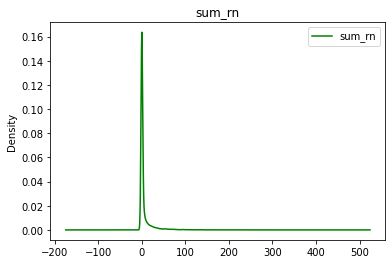

In [17]:
sum_rn.plot.density(color='green')
plt.title('sum_rn')
plt.show()

In [20]:
sum_rn

,date,add,sum_rn
0,2012-02-01,강원,0.040230
1,2012-02-01,경기,0.000000
2,2012-02-01,경남,0.047170
3,2012-02-01,경북,0.592958
4,2012-02-01,광주,0.083333
...,...,...,...
56253,2022-10-24,세종,0.000000
56254,2022-10-25,세종,0.000000
56255,2022-10-26,세종,0.000000
56256,2022-10-27,세종,0.000000


In [21]:
import statistics
statistics.median(sum_rn['sum_rn'])

0.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


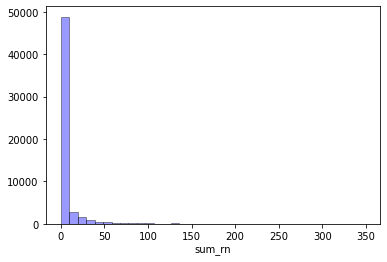

In [22]:

sns.distplot(sum_rn['sum_rn'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [33]:
sum_rn[sum_rn['sum_rn']<0.01]

,date,add,sum_rn
1,2012-02-01,경기,0.0
6,2012-02-01,대전,0.0
7,2012-02-01,부산,0.0
8,2012-02-01,서울,0.0
9,2012-02-01,울산,0.0
...,...,...,...
56253,2022-10-24,세종,0.0
56254,2022-10-25,세종,0.0
56255,2022-10-26,세종,0.0
56256,2022-10-27,세종,0.0


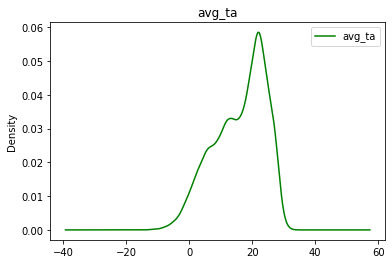

In [ ]:
avg_ta.plot.density(color='green')
plt.title('avg_ta')
plt.show()

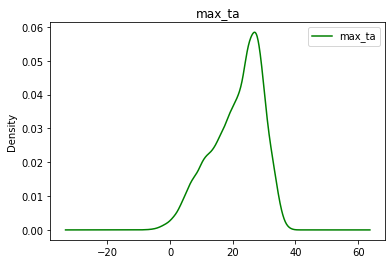

In [ ]:
max_ta.plot.density(color='green')
plt.title('max_ta')
plt.show()

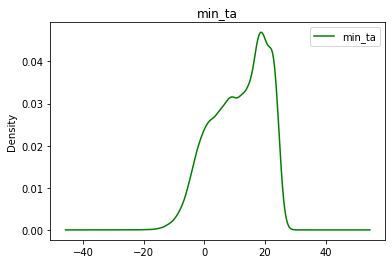

In [ ]:
min_ta.plot.density(color='green')
plt.title('min_ta')
plt.show()

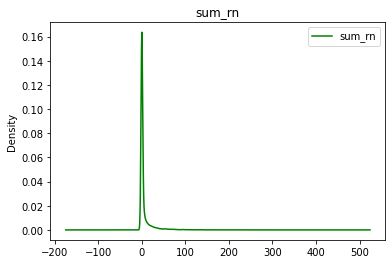

In [ ]:
sum_rn.plot.density(color='green')
plt.title('sum_rn')
plt.show()

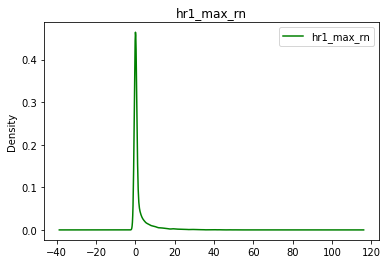

In [ ]:
hr1_max_rn.plot.density(color='green')
plt.title('hr1_max_rn')
plt.show()

In [ ]:
print(sum_rn[sum_rn['sum_rn']<0])
print(hr1_max_rn[hr1_max_rn['hr1_max_rn']<0])
print(sum_rn[sum_rn['sum_rn']>=0])
print(hr1_max_rn[hr1_max_rn['hr1_max_rn']>=0])

구름과 바람에 관련된 데이터들을 이상치라고 정의할 수 있는 방법이 없을 뿐더러 (상식적인 운량, 운고, 풍향을 정의하기 까다로움), variation 자체가 매우 크고, 극단치 자체도 정보를 가질 수 있는 변수라고 생각하여 이상치 대체를 진행하지 않기로 함.  
  
강수량 : 0 이상이어야 한다는 점과 값이 커질수록 그 확률이 매우 줄어든다는 특성을 고려해봤을 때 포아송분포를 따를 것이라고 생각. 그래프와 실제 데이터에서 0 아래로 찍히는 행이 없는 것으로 보아 대체해야 할 이상치가 없다고 판단. 
  
평균온도, 최고온도, 최저온도는 각 연도별 최고온도와 최저온도를 찾은 다음, 이를 벗어나는 값들을 측정 오류라고 판단하고 전날과 다음날의 linear interpolation으로 대체. 만약 이상치가 연속으로 있다면, 주위 지역의 평균값으로 대체. 어차피 최고온도랑 최저온도는 사용안하기로 했으니까 제외.

'ca', 'ch', 'avg_ws', 'mix_ws', 'max_ws', 'max_wd',
       'max_ws_wd', 'max_ins_ws', 'max_ins_ws_wd', 'mix_wd', 'avg_ta',
       'max_ta', 'min_ta', 'sum_rn', 'hr1_max_rn'

https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70  
참고(온도)  
근데 이걸 굳이 손으로 직접 해줄 필요가 있을까...? 저 사이트에 대놓고 실제값이 있는데...?
얘네도 결측값이 있더라고,,,

In [ ]:
sum_rn

,date,add,sum_rn
0,2012-02-01,강원,0.040230
1,2012-02-01,경기,0.000000
2,2012-02-01,경남,0.047170
3,2012-02-01,경북,0.592958
4,2012-02-01,광주,0.083333
...,...,...,...
56253,2022-10-24,세종,0.000000
56254,2022-10-25,세종,0.000000
56255,2022-10-26,세종,0.000000
56256,2022-10-27,세종,0.000000


상식적이지 않은 값들을 빼주기 

In [ ]:
avg_ta_Gangwon_summer[avg_ta_Gangwon_summer['avg_ta']>40]
avg_ta_Gangwon_winter[avg_ta_Gangwon_winter['avg_ta']<=-20]

,date,add,avg_ta


일단 극단치는 없는 것으로 보임.  
이제 계절별로 이상한게 없는지 확인해봐야 함.

In [ ]:
avg_ta['date']

str

In [ ]:
avg_ta['month'] = avg_ta['date'].map(lambda month: month[5:7])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
avg_ta

,date,add,avg_ta,month
0,2012-02-01,강원,-12.197727,02
1,2012-02-01,경기,-12.544954,02
2,2012-02-01,경남,-2.059259,02
3,2012-02-01,경북,-6.623611,02
4,2012-02-01,광주,-5.083333,02
...,...,...,...,...
56253,2022-10-24,세종,8.625000,10
56254,2022-10-25,세종,8.025000,10
56255,2022-10-26,세종,9.800000,10
56256,2022-10-27,세종,11.275000,10


In [ ]:
ta_03 = avg_ta[avg_ta['month']=='03']
ta_04 = avg_ta[avg_ta['month']=='04']
ta_05 = avg_ta[avg_ta['month']=='05']

ta_06 = avg_ta[avg_ta['month']=='06']
ta_07 = avg_ta[avg_ta['month']=='07']
ta_08 = avg_ta[avg_ta['month']=='08']
ta_09 = avg_ta[avg_ta['month']=='09']

ta_10 = avg_ta[avg_ta['month']=='10']
ta_11 = avg_ta[avg_ta['month']=='11']
ta_02 = avg_ta[avg_ta['month']=='02']

,date,add,avg_ta,month
440,2012-03-01,강원,4.504545,03
441,2012-03-01,경기,6.668468,03
442,2012-03-01,경남,7.351852,03
443,2012-03-01,경북,6.702778,03
444,2012-03-01,광주,7.583333,03
...,...,...,...,...
56049,2022-03-27,세종,7.400000,03
56050,2022-03-28,세종,6.575000,03
56051,2022-03-29,세종,9.000000,03
56052,2022-03-30,세종,10.650000,03
